# **Author : Madhavi Chavhan**

Data Science & Business Analytics Intern (Batch - Feb'21)

# **Task 1: Prediction using Supervised ML**

In this task, we have to develop a model to predict the percentage of marks a student is expected to score based on the number of hours he/she studied. This is implemented using Simple Linear Regression involving 2 variables.

In [21]:
from google.colab import drive

In [22]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# **Importing Libraries**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Loading Dataset**

In [24]:
df = pd.read_csv('/gdrive/MyDrive/student_scores.csv')

In [25]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [26]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Checking Null Values**

In [27]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Plotting the Distribution of Scores**

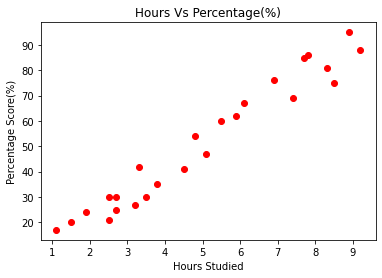

In [28]:
plt.scatter(df['Hours'], df['Scores'], color = 'red')
plt.title('Hours Vs Percentage(%)')
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Score(%)")
plt.show()


# **Preparing the Data**

In [29]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

# **Splitting the data into Training and Testing Sets**

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


# **Training the model**

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Model Trained!")

Model Trained!


# **Plotting the Regression Line**

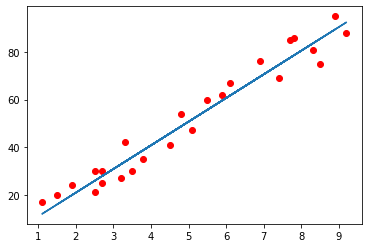

In [33]:
line = model.coef_*x + model.fit_intercept
plt.scatter(x, y, color = 'red')
plt.plot(x, line)
plt.show()


# **Making Predictions**

In [34]:
print(x_test)
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


# **Comparing Actual vs Predicted**

In [35]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df1

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# **Testing with custom data**

In [36]:
hrs = [[3.7]]
predict = model.predict(hrs)
print("No. of Hours = {}".format(hrs))
print("Predicted Score = {}".format(predict[0]))

No. of Hours = [[3.7]]
Predicted Score = 38.71641410925761


# **Evaluating the Model**

In [37]:
from sklearn import metrics
print('Mean Absolute Error(MAE) :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE) :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE) : 4.130879918502482
Mean Squared Error(MSE) : 20.33292367497996
Root Mean Squared Error(RMSE) : 4.509204328368805
